In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/openintro-possum/possum.csv


In [2]:
df = pd.read_csv('/kaggle/input/openintro-possum/possum.csv')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [5]:
df['Pop'].value_counts()

other    58
Vic      46
Name: Pop, dtype: int64

In [6]:
df['sex'].value_counts()

m    61
f    43
Name: sex, dtype: int64

In [7]:
#converting object data types into integters
df['Pop']=list(map(int,df['Pop']=='other'))
df['sex'] = list(map(int, df['sex']=='f'))

In [8]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,0,0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,0,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,0,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,0,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,0,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [9]:
# dropping case column as it is a redundant index
df.drop('case', axis = 1, inplace = True)

In [10]:
df.isnull().sum()

site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [11]:
df.columns

Index(['site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [12]:
# we'll impute the three rows with missing data based on the mean in these rows
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values = np.nan, strategy='mean')
df = imp_mean.fit_transform(df)

In [13]:
# reconverting to pandas dataframe and checking our work.
df = pd.DataFrame(df, columns = ['site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'])
df.isnull().sum()

site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [14]:
# All looks good!
df.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1.0,0.0,0.0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1.0,0.0,1.0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1.0,0.0,1.0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1.0,0.0,1.0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1.0,0.0,1.0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


# Exploratory Data Analysis

<AxesSubplot:>

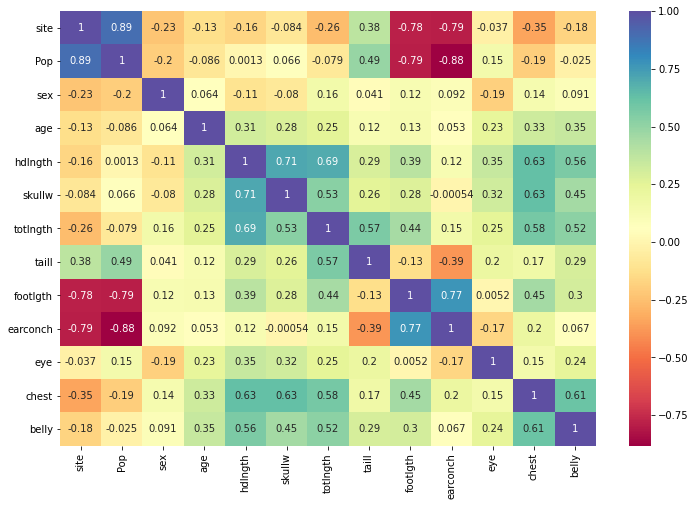

In [15]:
# what do we have here? 

# some interesting pocket correlations: 

# foot length positively correlated with ear conch size
# hind length, total length and skull width positvely correlated.
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, cmap = 'Spectral')

<AxesSubplot:xlabel='footlgth', ylabel='earconch'>

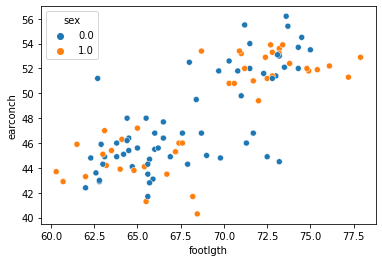

In [16]:
#earconch vs. footlength by sex. Orange is female
sns.scatterplot(x = 'footlgth', y = 'earconch', data =df, hue = 'sex')

<AxesSubplot:xlabel='skullw', ylabel='hdlngth'>

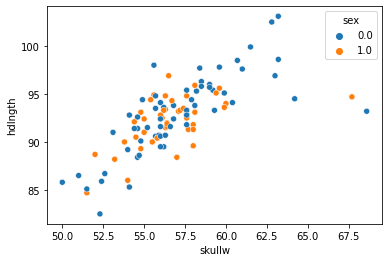

In [17]:
#skull width vs. hind length by sex. Orange is female.
sns.scatterplot(x = 'skullw', y = 'hdlngth', data =df, hue = 'sex')

<AxesSubplot:xlabel='skullw', ylabel='totlngth'>

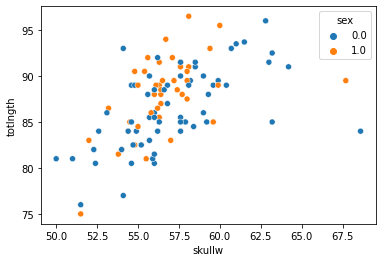

In [18]:
#skull width vs. total length by sex. Orange is female.
sns.scatterplot(x = 'skullw', y = 'totlngth', data =df, hue = 'sex')

<AxesSubplot:xlabel='hdlngth', ylabel='totlngth'>

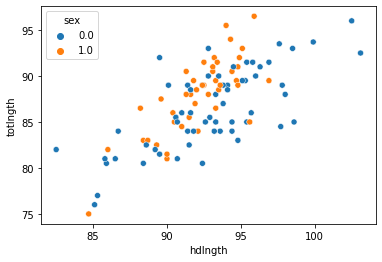

In [19]:
#hind length vs. total length by sex. Orange is female.
sns.scatterplot(x = 'hdlngth', y = 'totlngth', data =df, hue = 'sex')

<AxesSubplot:xlabel='age', ylabel='Count'>

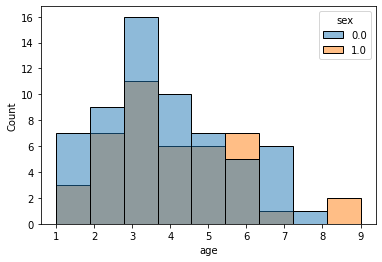

In [20]:
# distribution of age in dataset. More males present, but similar distribution of both sexes.
sns.histplot(x = 'age', data =df, hue = 'sex')

<AxesSubplot:xlabel='hdlngth', ylabel='Count'>

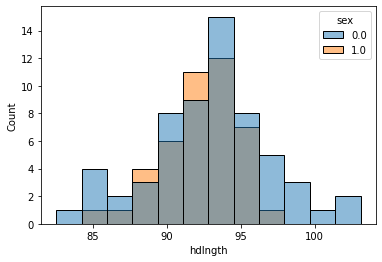

In [21]:
# distribution of hind length in dataset. Evenly distibuted between males and females.
sns.histplot(x = 'hdlngth', data =df, hue = 'sex')

<AxesSubplot:xlabel='skullw', ylabel='Count'>

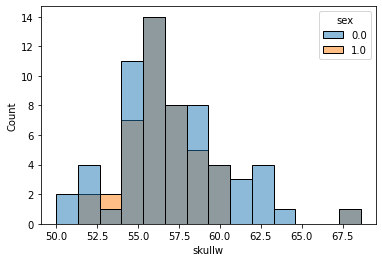

In [22]:
# distribution of skull width in dataset. Evenly distibuted between males and females.
sns.histplot(x = 'skullw', data =df, hue = 'sex')

<AxesSubplot:xlabel='totlngth', ylabel='Count'>

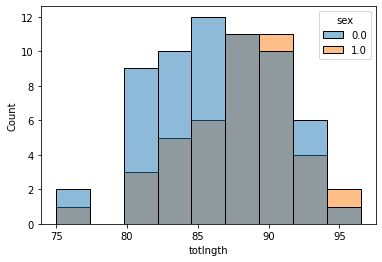

In [23]:
# distribution of total length in dataset. Female population appears to skew toward longer size.
sns.histplot(x = 'totlngth', data =df, hue = 'sex')

<AxesSubplot:xlabel='taill', ylabel='Count'>

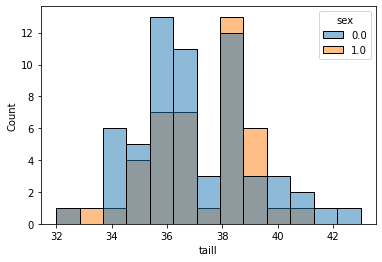

In [24]:
# distribution of tail length in dataset. Intesting bimodel distribution here. 
sns.histplot(x = 'taill', data =df, hue = 'sex')

<AxesSubplot:xlabel='footlgth', ylabel='Count'>

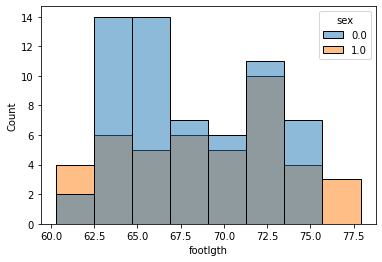

In [25]:
# distribution of foot length in dataset. Sampled males skew towards smaller foot. Sampled females skew 
#towards slightly larger foot.
sns.histplot(x = 'footlgth', data =df, hue = 'sex')

<AxesSubplot:xlabel='earconch', ylabel='Count'>

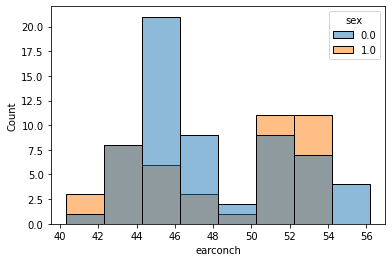

In [26]:
# distribution of ear conch in dataset. Another bimodel distribution in both sexes.
sns.histplot(x = 'earconch', data =df, hue = 'sex')

<AxesSubplot:xlabel='eye', ylabel='Count'>

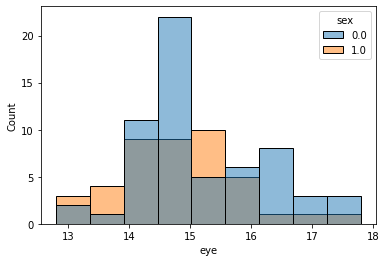

In [27]:
# distribution of eye in dataset. Normal distirbution.
sns.histplot(x = 'eye', data =df, hue = 'sex')

<AxesSubplot:xlabel='chest', ylabel='Count'>

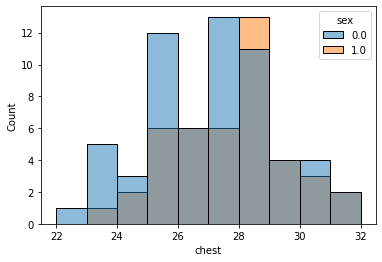

In [28]:
# distribution of chest in dataset. Somewhat normal distirbution.
sns.histplot(x = 'chest', data =df, hue = 'sex')

<AxesSubplot:xlabel='belly', ylabel='Count'>

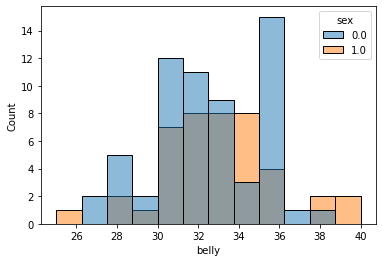

In [29]:
# distribution of belly in dataset. Somewhat normal distirbution.
sns.histplot(x = 'belly', data =df, hue = 'sex')

# Classification of Sex

In [30]:
#Given how similar the sexes are in all meaasured features, can we accurately classify male and female possums? 

# This will be our first classification task with this dataset

# Data and target feature

In [31]:
X = df.drop('sex', axis = 1)
y = df['sex']

# train test split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [33]:
# We'll train several classifiers: Logistic regression, Decision Tree Classifier, Random Forest Classifer and 
# XGBoost Classifer

#Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'newton-cg')
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [34]:
# Logistic regression struggles here

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,lr_pred))
print('\n')
print(confusion_matrix(y_test,lr_pred))

lr_acc = accuracy_score(y_test,lr_pred)

              precision    recall  f1-score   support

         0.0       0.87      0.57      0.68        23
         1.0       0.41      0.78      0.54         9

    accuracy                           0.62        32
   macro avg       0.64      0.67      0.61        32
weighted avg       0.74      0.62      0.64        32



[[13 10]
 [ 2  7]]


In [35]:
#Decision Tree Classifer

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)

In [36]:
# Decision tree classification struggles even more.

print(classification_report(y_test,dtc_pred))
print('\n')
print(confusion_matrix(y_test,dtc_pred))

dtc_acc = accuracy_score(y_test,dtc_pred)

              precision    recall  f1-score   support

         0.0       0.73      0.48      0.58        23
         1.0       0.29      0.56      0.38         9

    accuracy                           0.50        32
   macro avg       0.51      0.52      0.48        32
weighted avg       0.61      0.50      0.52        32



[[11 12]
 [ 4  5]]


In [37]:
#Random Forest Classifer

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

In [38]:
# Random forest roughly matches logistic regression in performance

print(classification_report(y_test,rfc_pred))
print('\n')
print(confusion_matrix(y_test,rfc_pred))

rfc_acc = accuracy_score(y_test,rfc_pred)

              precision    recall  f1-score   support

         0.0       0.81      0.57      0.67        23
         1.0       0.38      0.67      0.48         9

    accuracy                           0.59        32
   macro avg       0.59      0.62      0.57        32
weighted avg       0.69      0.59      0.61        32



[[13 10]
 [ 3  6]]


In [39]:
from xgboost import XGBClassifier
xgc = XGBClassifier(use_label_encoder = False)
xgc.fit(X_train,y_train)
xgc_pred = xgc.predict(X_test)

[19:34:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [40]:
# Random forest roughly matches logistic regression in performance

print(classification_report(y_test,xgc_pred))
print('\n')
print(confusion_matrix(y_test,xgc_pred))

xgc_acc = accuracy_score(y_test,xgc_pred)

              precision    recall  f1-score   support

         0.0       0.79      0.65      0.71        23
         1.0       0.38      0.56      0.45         9

    accuracy                           0.62        32
   macro avg       0.59      0.60      0.58        32
weighted avg       0.68      0.62      0.64        32



[[15  8]
 [ 4  5]]


In [41]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(2)
knc.fit(X_train,y_train)
knc_pred = knc.predict(X_test)

In [42]:
print(classification_report(y_test,knc_pred))
print('\n')
print(confusion_matrix(y_test,knc_pred))

knc_acc = accuracy_score(y_test,knc_pred)

              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84        23
         1.0       0.60      0.33      0.43         9

    accuracy                           0.75        32
   macro avg       0.69      0.62      0.63        32
weighted avg       0.73      0.75      0.72        32



[[21  2]
 [ 6  3]]


In [43]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)

In [44]:
print(classification_report(y_test,svc_pred))
print('\n')
print(confusion_matrix(y_test,svc_pred))

svc_acc = accuracy_score(y_test,svc_pred)

              precision    recall  f1-score   support

         0.0       0.88      0.61      0.72        23
         1.0       0.44      0.78      0.56         9

    accuracy                           0.66        32
   macro avg       0.66      0.69      0.64        32
weighted avg       0.75      0.66      0.67        32



[[14  9]
 [ 2  7]]


In [45]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)

In [46]:
print(classification_report(y_test,gnb_pred))
print('\n')
print(confusion_matrix(y_test,gnb_pred))

gnb_acc = accuracy_score(y_test,gnb_pred)

              precision    recall  f1-score   support

         0.0       0.74      0.61      0.67        23
         1.0       0.31      0.44      0.36         9

    accuracy                           0.56        32
   macro avg       0.52      0.53      0.52        32
weighted avg       0.62      0.56      0.58        32



[[14  9]
 [ 5  4]]


# Sex classification results

In [47]:
# The poor success here is due to the similarity between male and female possums.
results = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree Classifier',\
                                  'Random Forest Classifier', 'XGBoost Classifier',\
                                  'KNeighbors Classifier', 'SVC', 'GaussianNB'], 'Accuracy':\
                       [lr_acc, dtc_acc, rfc_acc,xgc_acc, knc_acc, svc_acc, gnb_acc]})
results

,Model,Accuracy
0,Logistic Regression,0.62500
1,Decision Tree Classifier,0.50000
2,Random Forest Classifier,0.59375
3,XGBoost Classifier,0.62500
4,KNeighbors Classifier,0.75000
5,SVC,0.65625
6,GaussianNB,0.56250


# KNeighbors wins!